In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitudes and longitudes

lats = np.random.uniform(-90.000, 90.000, size = 1500)
lngs = np.random.uniform(-90.000, 90.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

644

In [7]:
# Import Request module from Requests library
import requests

# Import Weather API Key
from config import weather_api_key

# Build base URL for Open Weather API requests
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + weather_api_key

# Import Datetime module from Datetime library
from datetime import datetime


In [15]:
city_url = url + '&q=' + city.replace(' ','+')
city_weather = requests.get(city_url)
print(city_weather.status_code)

200


In [16]:
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=93f5d26694cd60e824b1d6690254dfbd'

In [7]:
# Create an empty list to hold the city data
city_data = []

# Print the beginning of logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list

for i,city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
    # Create endpoint URL for each city
    city_url = url + '&q=' + city.replace(' ','+')
    
    # Log the URL, record, and set numbers and the city.
    print(f'Processing record {record_count} of set {set_count} | {city}')
    
    # Add the record count by 1
    record_count += 1
    
    # Run an API request for each city
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the data we need
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into the city_data list
        city_data.append({'City' : city.title(),
                          'Lat' : city_lat,
                          'Lng' : city_lng,
                          'Max Temp' : city_max_temp,
                          'Humidity' : city_humidity,
                          'Cloudiness' : city_clouds,
                          'Wind Speed' : city_wind,
                          'Country' : city_country,
                          'Date' : city_date})
        
    # If an error is experienced
    except:
        print(f' {city} was not found. Skipping...')
        pass
    

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing record 1 of set 1 | east london
Processing record 2 of set 1 | damavand
Processing record 3 of set 1 | ponta do sol
Processing record 4 of set 1 | massaguet
Processing record 5 of set 1 | barentsburg
 barentsburg was not found. Skipping...
Processing record 6 of set 1 | jiwani
Processing record 7 of set 1 | ouadda
Processing record 8 of set 1 | qaanaaq
Processing record 9 of set 1 | tumannyy
 tumannyy was not found. Skipping...
Processing record 10 of set 1 | georgetown
Processing record 11 of set 1 | ugoofaaru
Processing record 12 of set 1 | huarmey
Processing record 13 of set 1 | dikson
Processing record 14 of set 1 | jamestown
Processing record 15 of set 1 | torbay
Processing record 16 of set 1 | hermanus
Processing record 17 of set 1 | taolanaro
 taolanaro was not found. Skipping...
Processing record 18 of set 1 | brownsville
Processing record 19 of set 1 | ilo
Processing record 20 of set 1 | meulaboh
Processing

Processing record 37 of set 4 | kulhudhuffushi
Processing record 38 of set 4 | lipari
Processing record 39 of set 4 | capaci
Processing record 40 of set 4 | ornskoldsvik
Processing record 41 of set 4 | karasjok
Processing record 42 of set 4 | bell ville
Processing record 43 of set 4 | toamasina
Processing record 44 of set 4 | clarence town
Processing record 45 of set 4 | carnarvon
Processing record 46 of set 4 | goderich
Processing record 47 of set 4 | tsihombe
 tsihombe was not found. Skipping...
Processing record 48 of set 4 | naryan-mar
Processing record 49 of set 4 | havelock
Processing record 50 of set 4 | korcula
Processing record 1 of set 5 | nguruka
Processing record 2 of set 5 | westport
Processing record 3 of set 5 | saint george
Processing record 4 of set 5 | bonito
Processing record 5 of set 5 | sakakah
Processing record 6 of set 5 | kisii
Processing record 7 of set 5 | den helder
Processing record 8 of set 5 | gibara
Processing record 9 of set 5 | margate
Processing record

Processing record 24 of set 8 | port maria
Processing record 25 of set 8 | praia
Processing record 26 of set 8 | oistins
Processing record 27 of set 8 | husavik
Processing record 28 of set 8 | mbumi
Processing record 29 of set 8 | clyde river
Processing record 30 of set 8 | ishurdi
Processing record 31 of set 8 | turiacu
Processing record 32 of set 8 | stamsund
 stamsund was not found. Skipping...
Processing record 33 of set 8 | loviisa
Processing record 34 of set 8 | santa lucia
Processing record 35 of set 8 | louisbourg
 louisbourg was not found. Skipping...
Processing record 36 of set 8 | disna
Processing record 37 of set 8 | manitouwadge
Processing record 38 of set 8 | hamilton
Processing record 39 of set 8 | panaba
Processing record 40 of set 8 | lusaka
Processing record 41 of set 8 | ancud
Processing record 42 of set 8 | ustka
Processing record 43 of set 8 | andreapol
Processing record 44 of set 8 | quelimane
Processing record 45 of set 8 | moose factory
Processing record 46 of s

Processing record 16 of set 12 | qasigiannguit
Processing record 17 of set 12 | kuminskiy
Processing record 18 of set 12 | mumford
Processing record 19 of set 12 | neyshabur
Processing record 20 of set 12 | point pedro
Processing record 21 of set 12 | porto belo
Processing record 22 of set 12 | patu
Processing record 23 of set 12 | inhambane
Processing record 24 of set 12 | mocuba
Processing record 25 of set 12 | kochevo
Processing record 26 of set 12 | bubaque
Processing record 27 of set 12 | nantucket
Processing record 28 of set 12 | vallenar
Processing record 29 of set 12 | horta
Processing record 30 of set 12 | galway
Processing record 31 of set 12 | lumeje
Processing record 32 of set 12 | nadym
Processing record 33 of set 12 | vangazi
Processing record 34 of set 12 | barcelos
Processing record 35 of set 12 | malakal
Processing record 36 of set 12 | roros
Processing record 37 of set 12 | puerto cabezas
Processing record 38 of set 12 | ciochina
Processing record 39 of set 12 | port 

In [8]:
# Check how many cities were found and added to our list
len(city_data)

574

In [9]:
# Convert the list of dictionaries into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,East London,-33.0153,27.9116,71.44,72,84,20.56,ZA,2021-01-19 22:17:54
1,Damavand,35.7178,52.0650,42.80,39,0,1.88,IR,2021-01-19 22:17:54
2,Ponta Do Sol,32.6667,-17.1000,60.01,65,96,5.99,PT,2021-01-19 22:17:54
3,Massaguet,12.4755,15.4365,73.40,20,1,11.50,TD,2021-01-19 22:17:54
4,Jiwani,25.0500,61.7417,70.25,83,0,8.70,PK,2021-01-19 22:17:55
5,Ouadda,8.0777,22.4007,72.19,22,0,7.43,CF,2021-01-19 22:17:55
6,Qaanaaq,77.4840,-69.3632,2.41,71,99,8.46,GL,2021-01-19 22:15:11
7,Georgetown,5.4112,100.3354,77.00,83,40,2.30,MY,2021-01-19 22:17:55
8,Ugoofaaru,5.6667,73.0000,81.70,65,0,6.42,MV,2021-01-19 22:17:55
9,Huarmey,-10.0681,-78.1522,75.24,70,49,9.60,PE,2021-01-19 22:17:56


In [10]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,East London,ZA,2021-01-19 22:17:54,-33.0153,27.9116,71.44,72,84,20.56
1,Damavand,IR,2021-01-19 22:17:54,35.7178,52.0650,42.80,39,0,1.88
2,Ponta Do Sol,PT,2021-01-19 22:17:54,32.6667,-17.1000,60.01,65,96,5.99
3,Massaguet,TD,2021-01-19 22:17:54,12.4755,15.4365,73.40,20,1,11.50
4,Jiwani,PK,2021-01-19 22:17:55,25.0500,61.7417,70.25,83,0,8.70
5,Ouadda,CF,2021-01-19 22:17:55,8.0777,22.4007,72.19,22,0,7.43
6,Qaanaaq,GL,2021-01-19 22:15:11,77.4840,-69.3632,2.41,71,99,8.46
7,Georgetown,MY,2021-01-19 22:17:55,5.4112,100.3354,77.00,83,40,2.30
8,Ugoofaaru,MV,2021-01-19 22:17:55,5.6667,73.0000,81.70,65,0,6.42
9,Huarmey,PE,2021-01-19 22:17:56,-10.0681,-78.1522,75.24,70,49,9.60


In [11]:
# Create the output file to CSV
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [13]:
# Extract relevant fields from the DataFrame for plotting

lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

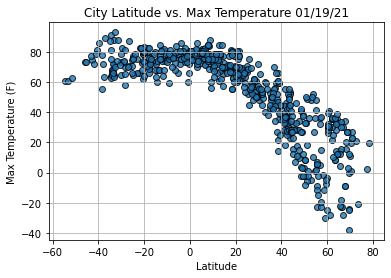

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature

plt.scatter(lats, max_temps, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# Add Title, Labels, and Grid to the scatter plot
plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig1.png')

# Show the plot
plt.show()

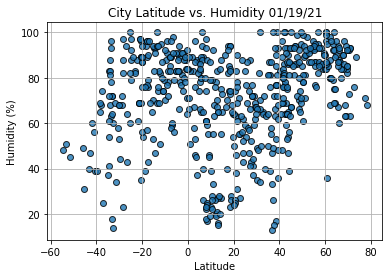

In [16]:
# Build the scatter plot for latitude vs. humidity

plt.scatter(lats, humidity, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# Add Title, Labels, and Grid to the scatter plot
plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig2.png')

# Show the plot
plt.show()

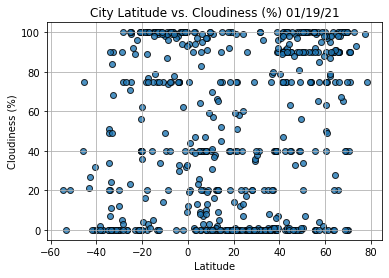

In [17]:
# Build the scatter plot for latitude vs. cloudiness

plt.scatter(lats, cloudiness, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# Add Title, Labels, and Grid to the scatter plot
plt.title(f'City Latitude vs. Cloudiness (%) ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig3.png')

# Show the plot
plt.show()

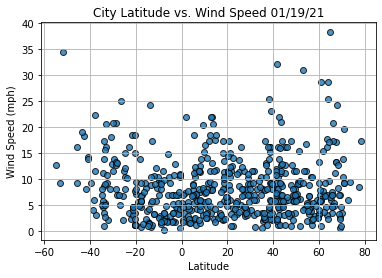

In [18]:
# Build the scatter plot for latitude vs. wind speed

plt.scatter(lats, wind_speed, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# Add Title, Labels, and Grid to the scatter plot
plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig4.png')

# Show the plot
plt.show()

In [31]:
#Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on weather data
# and plot a regression line and the equation with the data

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    

    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line 'y values' from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r')
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
# Create a northern hemisphere dataframe. All latitudes larger than 0 will be included
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Damavand,IR,2021-01-19 22:17:54,35.7178,52.0650,42.80,39,0,1.88
2,Ponta Do Sol,PT,2021-01-19 22:17:54,32.6667,-17.1000,60.01,65,96,5.99
3,Massaguet,TD,2021-01-19 22:17:54,12.4755,15.4365,73.40,20,1,11.50
4,Jiwani,PK,2021-01-19 22:17:55,25.0500,61.7417,70.25,83,0,8.70
5,Ouadda,CF,2021-01-19 22:17:55,8.0777,22.4007,72.19,22,0,7.43


In [33]:
# Create a southern hemisphere dataframe. All latitudes less than 0 will be included
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] <= 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,East London,ZA,2021-01-19 22:17:54,-33.0153,27.9116,71.44,72,84,20.56
9,Huarmey,PE,2021-01-19 22:17:56,-10.0681,-78.1522,75.24,70,49,9.60
13,Hermanus,ZA,2021-01-19 22:17:56,-34.4187,19.2345,64.00,83,51,11.07
15,Ilo,PE,2021-01-19 22:17:56,-17.6394,-71.3375,71.56,76,77,5.64
17,Ushuaia,AR,2021-01-19 22:17:57,-54.8000,-68.3000,60.80,48,20,12.66


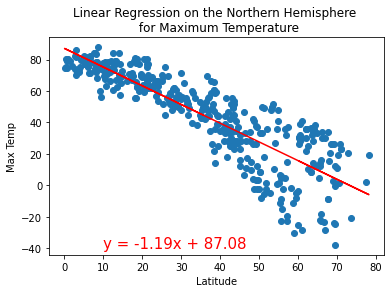

In [34]:
# Perform linear regression on the Northern Hemisphere for Max Temp

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
title = 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature'

# Call our function
plot_linear_regression(x_values, y_values, title , 'Max Temp', (10,-40))

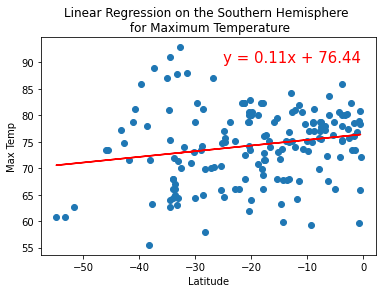

In [37]:
# Perform linear regression on the Southern Hemisphere for Max Temp

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
title = 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature'

# Call our function
plot_linear_regression(x_values, y_values, title, 'Max Temp', (-25,90))

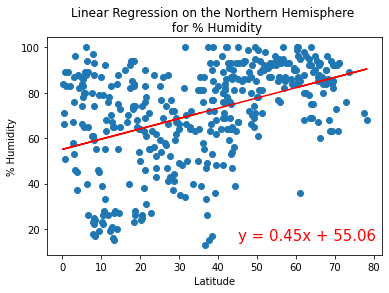

In [45]:
# Perform linear regression on the Northern Hemisphere for Humidity

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
title = 'Linear Regression on the Northern Hemisphere \n for % Humidity'

# Call our function
plot_linear_regression(x_values, y_values, title , '% Humidity', (45,15))

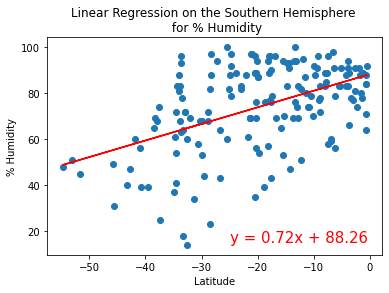

In [46]:
# Perform linear regression on the Northern Hemisphere for Humidity

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
title = 'Linear Regression on the Southern Hemisphere \n for % Humidity'

# Call our function
plot_linear_regression(x_values, y_values, title , '% Humidity', (-25,15))

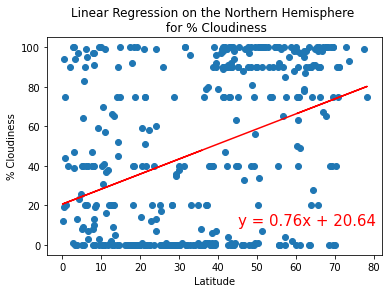

In [48]:
# Perform linear regression on the Northern Hemisphere for Cloudiness

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
title = 'Linear Regression on the Northern Hemisphere \n for % Cloudiness'

# Call our function
plot_linear_regression(x_values, y_values, title , '% Cloudiness', (45,10))

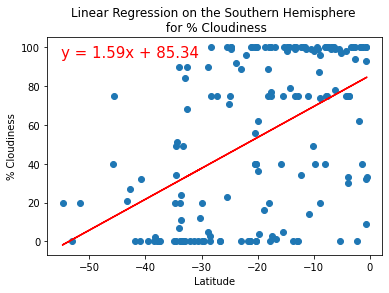

In [55]:
# Perform linear regression on the Southern Hemisphere for Cloudiness

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
title = 'Linear Regression on the Southern Hemisphere \n for % Cloudiness'

# Call our function
plot_linear_regression(x_values, y_values, title , '% Cloudiness', (-55,95))

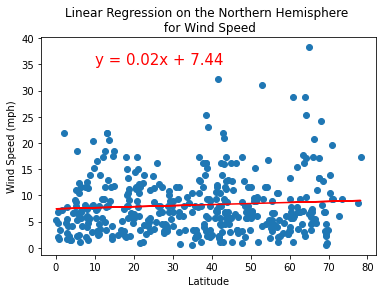

In [57]:
# Perform linear regression on the Northern Hemisphere for Wind Speed

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
title = 'Linear Regression on the Northern Hemisphere \n for Wind Speed'

# Call our function
plot_linear_regression(x_values, y_values, title , 'Wind Speed (mph)', (10,35))

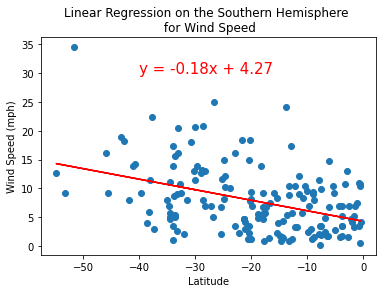

In [59]:
# Perform linear regression on the Southern Hemisphere for Wind Speed

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
title = 'Linear Regression on the Southern Hemisphere \n for Wind Speed'

# Call our function
plot_linear_regression(x_values, y_values, title , 'Wind Speed (mph)', (-40,30))